Read Data in dataframe

In [1]:
import pandas as pd
import numpy as np
data = pd.read_json("headline_cities_and_countries.json")
data = data.replace({None: np.nan})
data=data[["headline","countries","cities"]]
data.head()

,headline,countries,cities
0,Zika Outbreak Hits Miami,NaN,Miami
1,Could Zika Reach New York City?,NaN,New York City
2,First Case of Zika in Miami Beach,NaN,Miami Beach
3,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife
4,Dallas man comes down with case of Zika,NaN,Dallas


In [2]:
data.iloc[3:5]

,headline,countries,cities
3,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife
4,Dallas man comes down with case of Zika,NaN,Dallas


In [3]:
Renaming the columns to singular

SyntaxError: invalid syntax (<ipython-input-3-b46076794423>, line 1)

In [4]:
data = data.rename(columns=dict(countries="country", cities="city"))
data.tail()

,headline,country,city
645,Rumors about Rabies spreading in Jerusalem hav...,NaN,Jerusalem
646,More Zika patients reported in Indang,NaN,Indang
647,Suva authorities confirmed the spread of Rotav...,NaN,Suva
648,More Zika patients reported in Bella Vista,NaN,Bella Vista
649,Zika Outbreak in Wichita Falls,NaN,Wichita Falls


Investigate the Data

In [5]:
data.describe()

,headline,country,city
count,650,15,608
unique,647,10,574
top,Spanish Flu Outbreak in Lisbon,Brazil,Madrid
freq,2,3,4


Some duplicates in the data then check for duplicates and then drop any that are duplicated

In [6]:
data["headline"].value_counts().sort_values().tail()

Rumors about Syphilis spreading in Penal have been refuted    1
Zika cases in Singapore reach 393                             1
Spanish Flu Spreading through Madrid                          2
Barcelona Struck by Spanish Flu                               2
Spanish Flu Outbreak in Lisbon                                2
Name: headline, dtype: int64

In [7]:
print(f"There were {len(data)} rows before dropping duplicates.")
data = data.drop_duplicates()
print(f"There are {len(data)} rows after dropping duplicates.")

There were 650 rows before dropping duplicates.
There are 647 rows after dropping duplicates.


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 649
Data columns (total 3 columns):
headline    647 non-null object
country     15 non-null object
city        605 non-null object
dtypes: object(3)
memory usage: 20.2+ KB


Exploratory Plots

In [9]:
data['country'].value_counts()

Brazil       3
Malaysia     3
Panama       2
Singapore    1
Vietnam      1
Guatemala    1
Belize       1
Mexico       1
Thailand     1
Hong Kong    1
Name: country, dtype: int64

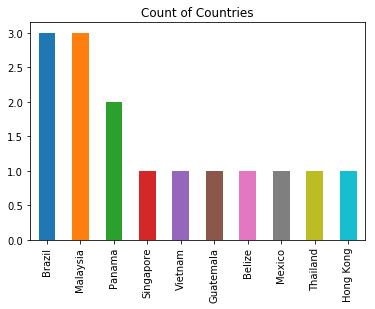

In [10]:
%matplotlib inline

_ = data['country'].value_counts().plot.bar(title='Count of Countries')

In [11]:
print(f'There are {data["country"].nunique()} different countries.')
print(f'There are {data["city"].nunique()} different cities.')

There are 10 different countries.
There are 574 different cities.


We have many more cities, so a bar plot might not be the best graphic.

In [12]:
data["city"].value_counts().sort_values().tail(10)

Barcelona       2
Cambridge       2
Palm Springs    2
Orange          2
Jefferson       2
Greenville      2
Johannesburg    2
Madrid          3
Miami           4
Monroe          4
Name: city, dtype: int64

Let's just look at the 10 most common cities.

In [13]:
data["city"].value_counts().sort_values().tail(10)

Barcelona       2
Cambridge       2
Palm Springs    2
Orange          2
Jefferson       2
Greenville      2
Johannesburg    2
Madrid          3
Miami           4
Monroe          4
Name: city, dtype: int64

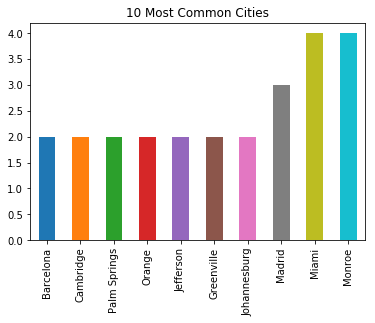

In [14]:
_ = (
    data["city"]
    .value_counts()
    .sort_values()
    .tail(10)
    .plot.bar(title="10 Most Common Cities")
)

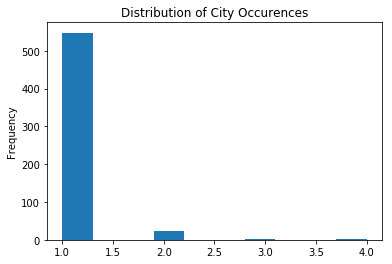

In [15]:
_ = data["city"].value_counts().plot.hist(title="Distribution of City Occurences")

For finding the cities, we need to use accented city names. We'll create an accented name column using our mapping from the previous section

In [17]:
!pip install geonamescache unidecode

import geonamescache
import unidecode

import json

gc = geonamescache.GeonamesCache()

# Read in the saved unaccented:accented mapping
with open("city_accent_mapping.json", "r") as fin:
    city_accented_mapping = json.loads(fin.read())

# Create a column for accented cities
data["accented_city"] = data["city"].map(city_accented_mapping)
data[data["city"] != data["accented_city"]].head()

     |████████████████████████████████| 839kB 4.5MB/s eta 0:00:01
     |████████████████████████████████| 245kB 25.1MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


,headline,country,city,accented_city
7,Geneve Scientists Battle to Find Cure,NaN,Geneve,Genève
9,Zika Infested Monkeys in Sao Paulo,NaN,Sao Paulo,São Paulo
17,Louisiana Zika cases up to 26,NaN,NaN,NaN
19,Zika infects pregnant woman in Cebu,NaN,NaN,NaN
47,18 new Zika Cases in Bogota,NaN,Bogota,Bogotá


For each city with multiple entries in geonames,choosing the city with the greatest population.

This is may occassionally be wrong, but a headline is more likely to mention a larger city (by population).

In [26]:
city = 'Boston'
gc.get_cities_by_name(city)

[{'2655138': {'geonameid': 2655138,
   'name': 'Boston',
   'latitude': 52.97633,
   'longitude': -0.02664,
   'countrycode': 'GB',
   'population': 41340,
   'timezone': 'Europe/London',
   'admin1code': 'ENG'}},
 {'4930956': {'geonameid': 4930956,
   'name': 'Boston',
   'latitude': 42.35843,
   'longitude': -71.05977,
   'countrycode': 'US',
   'population': 667137,
   'timezone': 'America/New_York',
   'admin1code': 'MA'}}]

To get the largest city, we sort the matches by the population key.

In [27]:
matches = gc.get_cities_by_name(city)
matches = [{k: v for k, v in list(match.values())[0].items()} for match in matches]
matches = sorted(matches, key=lambda x: x["population"], reverse=True)
matches

[{'geonameid': 4930956,
  'name': 'Boston',
  'latitude': 42.35843,
  'longitude': -71.05977,
  'countrycode': 'US',
  'population': 667137,
  'timezone': 'America/New_York',
  'admin1code': 'MA'},
 {'geonameid': 2655138,
  'name': 'Boston',
  'latitude': 52.97633,
  'longitude': -0.02664,
  'countrycode': 'GB',
  'population': 41340,
  'timezone': 'Europe/London',
  'admin1code': 'ENG'}]

Now let's find the locations of all the cities in the headlines. We'll want to be careful to go through the accented city names. If there are multiple matches for a city, we'll take the largest city.

In [28]:
city_locations = []

# Go through all the accented cities
for city in data["accented_city"]:
    # Find matches (if any)
    matches = gc.get_cities_by_name(city)
    if matches:
        # Sort from largest to smallest population
        matches = [
            {k: v for k, v in list(match.values())[0].items()} for match in matches
        ]
        matches = sorted(matches, key=lambda x: x["population"], reverse=True)

        # Find the match with the largest population
        match = matches[0]

        # Record the information
        city_locations.append(
            {
                "name": match["name"],
                "latitude": match["latitude"],
                "longitude": match["longitude"],
                "countrycode": match["countrycode"],
                "pop": match["population"],
            }
        )

city_locations[-5:]

[{'name': 'Jerusalem',
  'latitude': 31.76904,
  'longitude': 35.21633,
  'countrycode': 'IL',
  'pop': 801000},
 {'name': 'Indang',
  'latitude': 14.19528,
  'longitude': 120.87694,
  'countrycode': 'PH',
  'pop': 41159},
 {'name': 'Suva',
  'latitude': -18.14161,
  'longitude': 178.44149,
  'countrycode': 'FJ',
  'pop': 77366},
 {'name': 'Bella Vista',
  'latitude': 18.45539,
  'longitude': -69.9454,
  'countrycode': 'DO',
  'pop': 175683},
 {'name': 'Wichita Falls',
  'latitude': 33.91371,
  'longitude': -98.49339,
  'countrycode': 'US',
  'pop': 104710}]

convert this list of dictionaries to a dataframe.

In [29]:
city_locations = pd.DataFrame(city_locations)
city_locations.tail()

,countrycode,latitude,longitude,name,pop
600,IL,31.76904,35.21633,Jerusalem,801000
601,PH,14.19528,120.87694,Indang,41159
602,FJ,-18.14161,178.44149,Suva,77366
603,DO,18.45539,-69.94540,Bella Vista,175683
604,US,33.91371,-98.49339,Wichita Falls,104710


In [30]:
city_locations = city_locations.drop_duplicates()
print(f"We have the locations for {city_locations.shape[0]} unique cities.")

We have the locations for 574 unique cities.


Next let's merge with the headlines on the accented_city and name.

In [31]:
data = pd.merge(
    data, city_locations, left_on="accented_city", right_on="name", how="left"
)
data.head()

,headline,country,city,accented_city,countrycode,latitude,longitude,name,pop
0,Zika Outbreak Hits Miami,NaN,Miami,Miami,US,25.77427,-80.19366,Miami,441003.0
1,Could Zika Reach New York City?,NaN,New York City,New York City,US,40.71427,-74.00597,New York City,8175133.0
2,First Case of Zika in Miami Beach,NaN,Miami Beach,Miami Beach,US,25.79065,-80.13005,Miami Beach,92312.0
3,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife,Recife,BR,-8.05389,-34.88111,Recife,1478098.0
4,Dallas man comes down with case of Zika,NaN,Dallas,Dallas,US,32.78306,-96.80667,Dallas,1300092.0


Let's make sure keeping the largest city worked. We can try Boston as well as Rochester, both of which should be in the United States.

In [32]:
data[data['city'] == 'Boston']

,headline,country,city,accented_city,countrycode,latitude,longitude,name,pop
27,Flu season hits Boston,NaN,Boston,Boston,US,42.35843,-71.05977,Boston,667137.0


In [33]:
data[data['city'] == 'Rochester']

,headline,country,city,accented_city,countrycode,latitude,longitude,name,pop
84,Rochester authorities confirmed the spread of ...,NaN,Rochester,Rochester,US,43.15478,-77.61556,Rochester,209802.0
298,Herpes Keeps Spreading in Rochester,NaN,Rochester,Rochester,US,43.15478,-77.61556,Rochester,209802.0


Data Cleaning

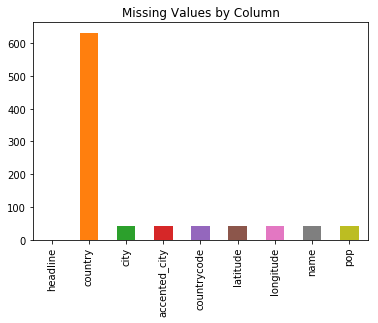

In [35]:
_ = data.isna().sum().plot.bar(title='Missing Values by Column')

see there are quite a few missing values in the country column. Let's just remove the country since it does not give us much information.

In [36]:
data = data.drop(columns=['country'])

Let's investigate the headlines where we don't have a name. We might be able to figure out more data cleaning steps to take.

In [37]:
pd.options.display.max_colwidth = 100

no_name = data[data["name"].isna()].copy()

print(f"There are {len(no_name)} headlines without a city.")

no_name.tail()

There are 42 headlines without a city.


,headline,city,accented_city,countrycode,latitude,longitude,name,pop
596,Zika arrives in Dangriga,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,More Patients in Maynard are Getting Diagnosed with Syphilis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
625,Zika case reported in Antioquia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627,Chikungunya has not Left Pismo Beach,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628,Zika spreads to La Joya,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
city_set = set(city_accented_mapping.keys())

for city in ["Dangriga", "Maynard", "Antioquia", "Pismo Beach", "La Joya"]:
    if city in city_set:
        print("Found ", city)
    else:
        print("Did Not Find City")

Did Not Find City
Did Not Find City
Did Not Find City
Did Not Find City
Did Not Find City


It appears that the 42 headlines without a city name may have a city, but it is not included in geonamescache. We'll have to go ahead and remove these cities since they cannot be used.

In [39]:
data = data.dropna(subset=['name'])
data.describe()

,latitude,longitude,pop
count,605.000000,605.000000,6.050000e+02
mean,26.730761,-38.233048,8.910827e+05
std,20.631955,79.475181,1.973884e+06
min,-53.787690,-156.506040,1.338100e+04
25%,15.711800,-90.444300,5.952300e+04
50%,33.749000,-76.496610,1.713800e+05
75%,40.714270,7.095490,6.480340e+05
max,59.938630,179.364510,1.307630e+07


In [40]:
print(f'We have the city locations for {len(data)} cities.')

We have the city locations for 605 cities.


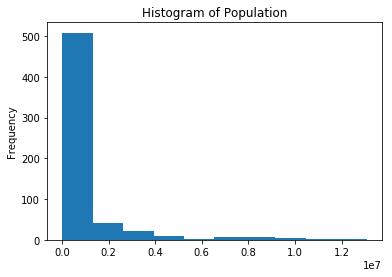

In [41]:
_ = data['pop'].plot.hist(title='Histogram of Population')

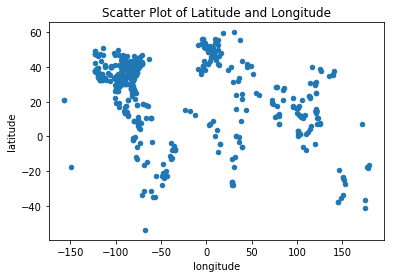

In [42]:
_ = data.plot.scatter(
    x="longitude", y="latitude", title="Scatter Plot of Latitude and Longitude"
)

In [43]:
data = data.drop(columns=['name'])
data.tail()

,headline,city,accented_city,countrycode,latitude,longitude,pop
642,Rumors about Rabies spreading in Jerusalem have been refuted,Jerusalem,Jerusalem,IL,31.76904,35.21633,801000.0
643,More Zika patients reported in Indang,Indang,Indang,PH,14.19528,120.87694,41159.0
644,Suva authorities confirmed the spread of Rotavirus,Suva,Suva,FJ,-18.14161,178.44149,77366.0
645,More Zika patients reported in Bella Vista,Bella Vista,Bella Vista,DO,18.45539,-69.94540,175683.0
646,Zika Outbreak in Wichita Falls,Wichita Falls,Wichita Falls,US,33.91371,-98.49339,104710.0


In [44]:
data[['headline', 'city', 'latitude', 'longitude', 'countrycode']].head(10)

,headline,city,latitude,longitude,countrycode
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US
1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US
2,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US
3,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR
4,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US
5,Trinidad confirms first Zika case,Trinidad,-14.83333,-64.90000,BO
6,Zika Concerns are Spreading in Houston,Houston,29.76328,-95.36327,US
7,Geneve Scientists Battle to Find Cure,Geneve,46.20222,6.14569,CH
8,The CDC in Atlanta is Growing Worried,Atlanta,33.74900,-84.38798,US
9,Zika Infested Monkeys in Sao Paulo,Sao Paulo,-23.54750,-46.63611,BR


In [45]:
data.to_csv('processed_headlines_locations.csv')